<a href="https://colab.research.google.com/github/vale314/machine-learning-course-CUCEI-00/blob/main/Challenge07.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Graficos embebidos.
%matplotlib inline


In [ ]:
import numpy as np #importando numpy
from scipy import stats # importando scipy.stats
import matplotlib.pyplot as plt # importando matplotlib
import seaborn as sns # importando seaborn
import seaborn as sb


# parámetros estéticos de seaborn
sns.set_palette("deep", desat=.6)
sns.set_context(rc={"figure.figsize": (8, 4)})
import numpy as np #importando numpy
from scipy import stats # importando scipy.stats
import seaborn as sns # importando seaborn
import seaborn as sb


# parámetros estéticos de seaborn
sns.set_palette("deep", desat=.6)
sns.set_context(rc={"figure.figsize": (8, 4)})

In [ ]:
# Trabajando con una ruta relativa
path = './drive/MyDrive/CUCEI/ML-COURSE-JUAN/Students/' 

# Colocamos en una variable el archivo a trabajar
archivo = 'StudentsPerformance1.csv'

In [ ]:
# Paquete requerido para listar los archivos del directorio
from os import listdir

In [ ]:
import pandas as pd

In [ ]:
Files = []
for File in listdir(path):
    # Escribir la RUTA COMPLETA de cada archivo
    Files.append(File)

In [ ]:
# Mostramos los archivos del directorio que hemos decidido trabajar
Files

['StudentsPerformance.csv',
 'StudentsPerformance.gsheet',
 'StudentsPerformance1.csv']

In [ ]:
df = pd.read_csv(path+archivo, index_col=0)

In [ ]:
df.shape

(1000, 8)

In [ ]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
NaN,female,group B,bachelor's degree,standard,none,72,72,74
NaN,female,group C,some college,standard,completed,69,90,88
NaN,female,group B,master's degree,standard,none,90,95,93
NaN,male,group A,associate's degree,free/reduced,none,47,57,44
NaN,male,group C,some college,standard,none,76,78,75


In [ ]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [ ]:
X = np.asarray(df[['math score','reading score','writing score']])

X[0:5]

array([[72, 72, 74],
       [69, 90, 88],
       [90, 95, 93],
       [47, 57, 44],
       [76, 78, 75]])

In [ ]:
from sklearn import preprocessing

In [ ]:
labelencoder = preprocessing.LabelEncoder()

In [ ]:
df['gender_e'] = labelencoder.fit_transform(df['gender']) 

In [ ]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,gender_e
NaN,female,group B,bachelor's degree,standard,none,72,72,74,0
NaN,female,group C,some college,standard,completed,69,90,88,0
NaN,female,group B,master's degree,standard,none,90,95,93,0
NaN,male,group A,associate's degree,free/reduced,none,47,57,44,1
NaN,male,group C,some college,standard,none,76,78,75,1


In [ ]:
 y = np.asarray(df['gender_e'])

 y[0:5] 

array([0, 0, 0, 1, 1])

In [ ]:
X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[ 0.39,  0.19,  0.39],
       [ 0.19,  1.43,  1.31],
       [ 1.58,  1.77,  1.64],
       [-1.26, -0.83, -1.58],
       [ 0.65,  0.61,  0.46]])

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)

print ('Train set:', X_train.shape,  y_train.shape)

print ('Test set:', X_test.shape,  y_test.shape)


Train set: (800, 3) (800,)
Test set: (200, 3) (200,)


In [ ]:
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import confusion_matrix

LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)

LR


LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
yhat = LR.predict(X_test)

yhat


array([0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1])

In [ ]:
yhat_prob = LR.predict_proba(X_test)

yhat_prob[:5]


array([[0.75821034, 0.24178966],
       [0.6643197 , 0.3356803 ],
       [0.46867952, 0.53132048],
       [0.61101734, 0.38898266],
       [0.21006106, 0.78993894]])

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

import itertools

def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):

  if normalize:

    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    print("Matriz de confusión normalizada")

  else:

    print('Matriz de confusión sin normalización')

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)

  plt.title(title)

  plt.colorbar()

  tick_marks = np.arange(len(classes))

  plt.xticks(tick_marks, classes, rotation=45)

  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'

  thresh = cm.max() / 2.

  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")
  
  plt.tight_layout()

  plt.ylabel('Etiqueta Real')

  plt.xlabel('Etiqueta Predicha')

print(confusion_matrix(y_test, yhat, labels=[1,0]))


[[72 25]
 [15 88]]


Matriz de confusión sin normalización
[[72 25]
 [15 88]]


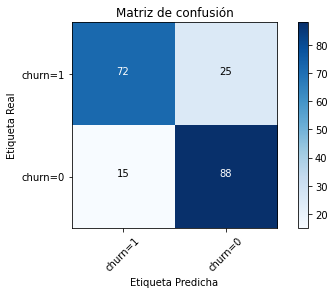

In [ ]:
#Calcular la matriz de confusión

cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,0])

np.set_printoptions(precision=2)
plt.figure()

plot_confusion_matrix(cnf_matrix, classes=['churn=1','churn=0'],normalize= False, title='Matriz de confusión')


In [ ]:
print (classification_report(y_test, yhat))

              precision    recall  f1-score   support

           0       0.78      0.85      0.81       103
           1       0.83      0.74      0.78        97

    accuracy                           0.80       200
   macro avg       0.80      0.80      0.80       200
weighted avg       0.80      0.80      0.80       200

